<a href="https://colab.research.google.com/github/arshiyafathima1/Data-Preprocessing-/blob/main/SVM15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns

In [77]:
df = pd.read_csv('breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [78]:
df.shape

(569, 32)

In [79]:
X = df.iloc[:,[2,3]]
y = df['diagnosis']

In [80]:
X.head()

,radius_mean,texture_mean
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


In [23]:
y.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
print('Training data :',X_train.shape)
print('Training data :',y_train.shape)

Training data : (455, 2)
Training data : (455,)


In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [30]:
y_pred

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B'], dtype=object)

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[62,  5],
       [ 7, 40]])

In [35]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
ac

0.8947368421052632

In [43]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

In [44]:
print('Accuracy score on test data : with default rbf kernel')
print(accuracy_score(y_test,y_pred))

Accuracy score on test data : with default rbf kernel
0.8771929824561403


In [45]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',gamma=15 , C = 7 ,random_state=0)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

In [46]:
from sklearn import metrics
print('Accuracy score on test data : with custom rbf kernel')
print(accuracy_score(y_test,y_pred))

Accuracy score on test data : with custom rbf kernel
0.8333333333333334


In [49]:
svc = SVC(kernel='poly',degree=0)
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)
print('Accuracy score on test data : with default rbf kernel')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy score on test data : with default rbf kernel
0.5877192982456141


In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Evaluate the default rbf kernel SVC
# Assuming y_pred from the last rbf kernel cell (w8My8hTwcVXC) is available
# If not, you may need to re-run the prediction step after that cell
# y_pred_rbf_default = classifier.predict(X_test) # Uncomment and run if needed
cm_rbf_default = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (Default RBF Kernel):")
print(cm_rbf_default)
print("Accuracy Score (Default RBF Kernel):", accuracy_score(y_test, y_pred))


Confusion Matrix (Default RBF Kernel):
[[67  0]
 [47  0]]
Accuracy Score (Default RBF Kernel): 0.5877192982456141


In [81]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

#predicting test set results
y_pred = classifier.predict(X_test)

/tmp/ipython-input-4124885577.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_pred_numeric = pd.Series(y_pred).replace({'M': 1, 'B': 0}).values


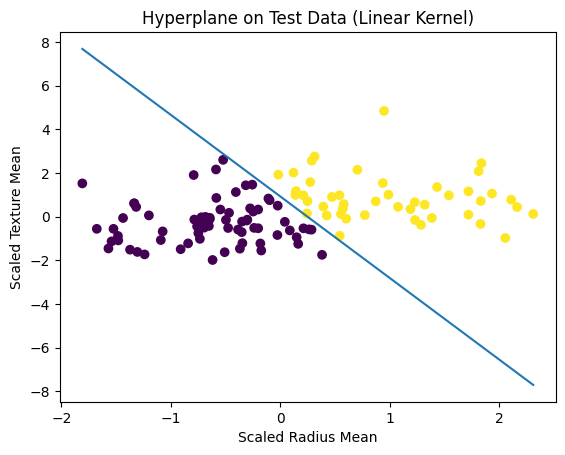

In [83]:
#plot data points
# Ensure y_pred is numeric for plotting
y_pred_numeric = pd.Series(y_pred).replace({'M': 1, 'B': 0}).values

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_numeric, cmap='viridis')

#create hyperplane for the linear kernel.
# Assuming the linear classifier is stored in a variable named 'linear_classifier'
# If your linear classifier variable has a different name, please update 'linear_classifier' below
w = classifier.coef_[0]
a = -w[0] / w[1]

xx = np.linspace(X_test[:, 0].min(), X_test[:, 0].max())
yy = a * xx - (classifier.intercept_[0]) / w[1]

#plot the hyperplane
plt.plot(xx, yy)
plt.title('Hyperplane on Test Data (Linear Kernel)')
plt.xlabel('Scaled Radius Mean')
plt.ylabel('Scaled Texture Mean')
plt.show()